In [3]:
import keras
keras.__version__

from keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

2113536/2110848 [==============================] - 28s 13us/step


In [10]:
print (train_labels.shape)

(8982,)


In [11]:
from keras.datasets import reuters
(train_data1, train_labels1), (test_data1, test_labels1) = reuters.load_data(num_words=100)

In [17]:
print (len(train_data1[1]))

56


In [19]:
word_index=reuters.get_word_index()

For the sake of visualising the data it's not a . bad idea to print the word_index but I have commented it out as it's a long list.

In [25]:
#print (word_index)
reversed_word_index=dict([ (value, key) for (key,value) in word_index.items()])
#print (reversed_word_index)

In [52]:

#decoded_newswire = ' '.join([reversed_word_index.get(i - 3, '?')
#                             for i in train_data[0]])

# because 0, 1 and 2 are reserved indices for 
#"padding", "start of sequence", and "unknown".
# Hence we'll do i-3 for i in train_data[0]

decoded_newswire=' '
for i in train_data[0]:
    wrd = reversed_word_index.get(i-3, '')
    decoded_newswire = decoded_newswire+' '+str(wrd)
print (decoded_newswire)

     said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3


## Prepare the data

In [55]:
##vectorize the data.
import numpy as np

def vectorize_sequence(sequences, dims=10000):
    res=np.zeros((len(sequences), dims))
    for i, s in enumerate(sequences):
        res[i, s]=1
    return res

x_train=vectorize_sequence(train_data)
x_test=vectorize_sequence(test_data)

In [57]:
## vectorize the ylabels using one-hot-coding

def one_hot(labs, dimensions=46):
    res=np.zeros((len(labs), dimensions))
    for i,l in enumerate(labs):
        res[i,l] =1
    return res

y_train=one_hot(train_labels)
y_test=one_hot(test_labels)

Remember the one-hot is encoded in keras by the name of to_categorical.


## Now build the model


In [58]:
from keras import models, layers

mymodel=models.Sequential()
mymodel.add(layers.Dense(64, activation='relu', input_shape=(10000,))) # remember 10000 is the max value of nx
mymodel.add(layers.Dense(64, activation='relu'))
mymodel.add(layers.Dense(46, activation='softmax'))  # remember 46 is the value of ny


mymodel.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])



#### Prepare the training and cross-validation data

In [59]:
x_cv=x_train[:1000]
x_train_part=x_train[1000:]

y_cv=y_train[:1000]
y_train_part=y_train[1000:]

In [60]:
# Fit the model

model_out = mymodel.fit(x_train_part, y_train_part, 
                        epochs=20, batch_size=512,
                       validation_data=(x_cv, y_cv))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 2s 203us/step - loss: 2.5724 - accuracy: 0.5263 - val_loss: 1.7123 - val_accuracy: 0.6370
Epoch 2/20
7982/7982 [==============================] - 1s 129us/step - loss: 1.4068 - accuracy: 0.7008 - val_loss: 1.3038 - val_accuracy: 0.7160
Epoch 3/20
7982/7982 [==============================] - 1s 93us/step - loss: 1.0519 - accuracy: 0.7740 - val_loss: 1.1371 - val_accuracy: 0.7520
Epoch 4/20
7982/7982 [==============================] - 1s 95us/step - loss: 0.8314 - accuracy: 0.8246 - val_loss: 1.0397 - val_accuracy: 0.7830
Epoch 5/20
7982/7982 [==============================] - 1s 110us/step - loss: 0.6626 - accuracy: 0.8631 - val_loss: 0.9843 - val_accuracy: 0.7930
Epoch 6/20
7982/7982 [==============================] - 1s 109us/step - loss: 0.5292 - accuracy: 0.8916 - val_loss: 0.9298 - val_accuracy: 0.7990
Epoch 7/20
7982/7982 [==============================] - 1s 101us/step - loss: 

In [65]:
model_out.history.keys()

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])

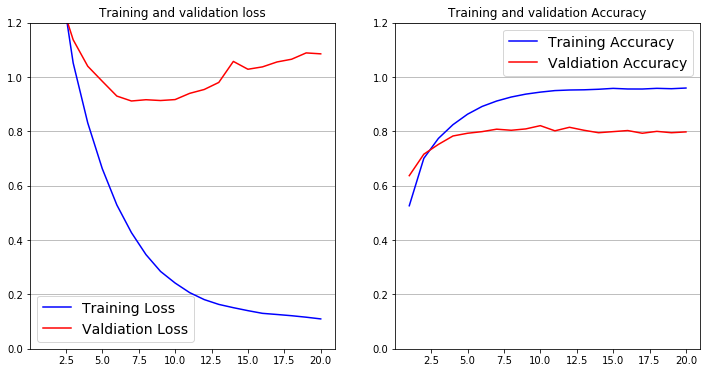

In [67]:
import matplotlib.pyplot as plt

acc=model_out.history['accuracy']
val_acc=model_out.history['val_accuracy']
loss=model_out.history['loss']
val_loss=model_out.history['val_loss']

epochs=range(1, len(acc)+1)

plt.figure(figsize=(12,6))
plt.subplot(121)
plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Valdiation Loss')
plt.title('Training and validation loss')
plt.ylim([0,1.2]); plt.grid(axis='y'); plt.legend(fontsize=14)

plt.subplot(122)
plt.plot(epochs, acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Valdiation Accuracy')
plt.title('Training and validation Accuracy')
plt.ylim([0,1.2]); plt.grid(axis='y'); plt.legend(fontsize=14)
plt.show()



Based on the validation loss figure, it's pretty clear that the validation starts increasing after 7th epoch. Which means our model is overfitting. Hence for the test set we should only train the entire training set for only 7 epochs. Let's train the model one more time with the whole train set. And after that we'll test it on the test data.

In [69]:
from keras import models, layers

keras.backend.clear_session()

mymodel=models.Sequential()
mymodel.add(layers.Dense(64, activation='relu', input_shape=(10000,))) # remember 10000 is the max value of nx
mymodel.add(layers.Dense(64, activation='relu'))
mymodel.add(layers.Dense(46, activation='softmax'))  # remember 46 is the value of ny


mymodel.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

model_out = mymodel.fit(x_train_part, y_train_part, 
                        epochs=7, batch_size=512,
                       validation_data=(x_cv, y_cv))

Train on 7982 samples, validate on 1000 samples
Epoch 1/7
7982/7982 [==============================] - 1s 121us/step - loss: 2.6001 - accuracy: 0.5167 - val_loss: 1.7029 - val_accuracy: 0.6460
Epoch 2/7
7982/7982 [==============================] - 1s 106us/step - loss: 1.3907 - accuracy: 0.7147 - val_loss: 1.2790 - val_accuracy: 0.7300
Epoch 3/7
7982/7982 [==============================] - 1s 99us/step - loss: 1.0291 - accuracy: 0.7870 - val_loss: 1.1177 - val_accuracy: 0.7530
Epoch 4/7
7982/7982 [==============================] - 1s 100us/step - loss: 0.8157 - accuracy: 0.8276 - val_loss: 1.0443 - val_accuracy: 0.7720
Epoch 5/7
7982/7982 [==============================] - 1s 98us/step - loss: 0.6601 - accuracy: 0.8618 - val_loss: 0.9564 - val_accuracy: 0.8070
Epoch 6/7
7982/7982 [==============================] - 1s 105us/step - loss: 0.5315 - accuracy: 0.8891 - val_loss: 0.9314 - val_accuracy: 0.8070
Epoch 7/7
7982/7982 [==============================] - 1s 101us/step - loss: 0.4296 

In [70]:
preds= mymodel.predict(x_test)

In [72]:
print (y_test.shape, preds.shape)

(2246, 46) (2246, 46)
